# eBridge - Data Preprocessing

## Master of Science in Electronics - Emphasis on Embedded Systems

## Costa Rica TEC

[eBridge Github Page](https://github.com/Anibalru/E-Bridge).  

Our goal is to identify patterns on CPU load behaviors.

## Data Preprocessing

First step is to load the libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Load the dataset

The code below is used to load the dataset.

In [2]:
CoreData = pd.read_csv("Logs/RPI3-2/coreslog_2021-05-16_08-42.csv",dtype={"Time": "string", "1": np.float64,"2": np.float64,
                                                            "3": np.float64,"4": np.float64})

The following commands allows to have a preview of the dataset.

In [3]:
CoreData.head()

,Time,1,2,3,4
0,2021-05-16 08:42:05,100.0,0.0,0.0,100.0
1,2021-05-16 08:42:10,1.4,5.4,26.9,13.7
2,2021-05-16 08:42:15,1.6,1.8,90.5,21.0
3,2021-05-16 08:42:20,73.9,15.4,3.0,21.3
4,2021-05-16 08:42:25,22.1,70.1,1.2,20.5


Convert the time to timestamp

In [4]:
CoreData['Time'] = pd.to_datetime(CoreData['Time'])

In [5]:
CoreData.describe()

,1,2,3,4
count,27708.000000,27708.000000,27708.000000,27708.000000
mean,25.601306,30.027988,30.359474,30.934763
std,17.840367,18.281985,18.222370,17.883178
min,0.000000,0.000000,0.000000,0.000000
25%,12.700000,17.900000,18.200000,19.300000
50%,24.400000,29.100000,29.250000,29.800000
75%,36.500000,40.600000,40.800000,41.000000
max,100.000000,93.400000,94.900000,100.000000


In [6]:
CoreData['Time']

0       2021-05-16 08:42:05
1       2021-05-16 08:42:10
2       2021-05-16 08:42:15
3       2021-05-16 08:42:20
4       2021-05-16 08:42:25
                ...        
27703   2021-05-17 23:13:51
27704   2021-05-17 23:13:56
27705   2021-05-17 23:14:01
27706   2021-05-17 23:14:06
27707   2021-05-17 23:14:11
Name: Time, Length: 27708, dtype: datetime64[ns]

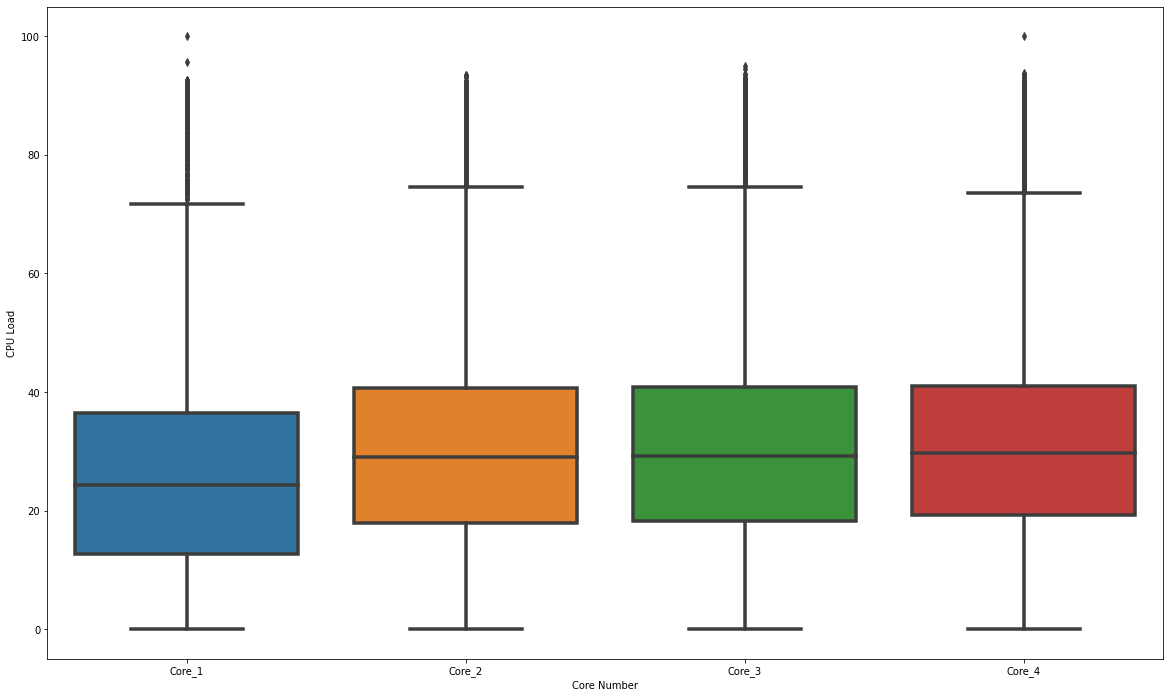

In [7]:
# Create Box Plots for Dataset

Core_Data = [CoreData['1'],CoreData['2'],
              CoreData['3'],CoreData['4']]
plt.figure(figsize=(20,12))
g = sns.boxplot(data=Core_Data, linewidth=3.5).set(xlabel='Core Number', ylabel='CPU Load')
plt.xticks(ticks = [0,1,2,3], labels = ['Core_1','Core_2','Core_3','Core_4'])
plt.show()

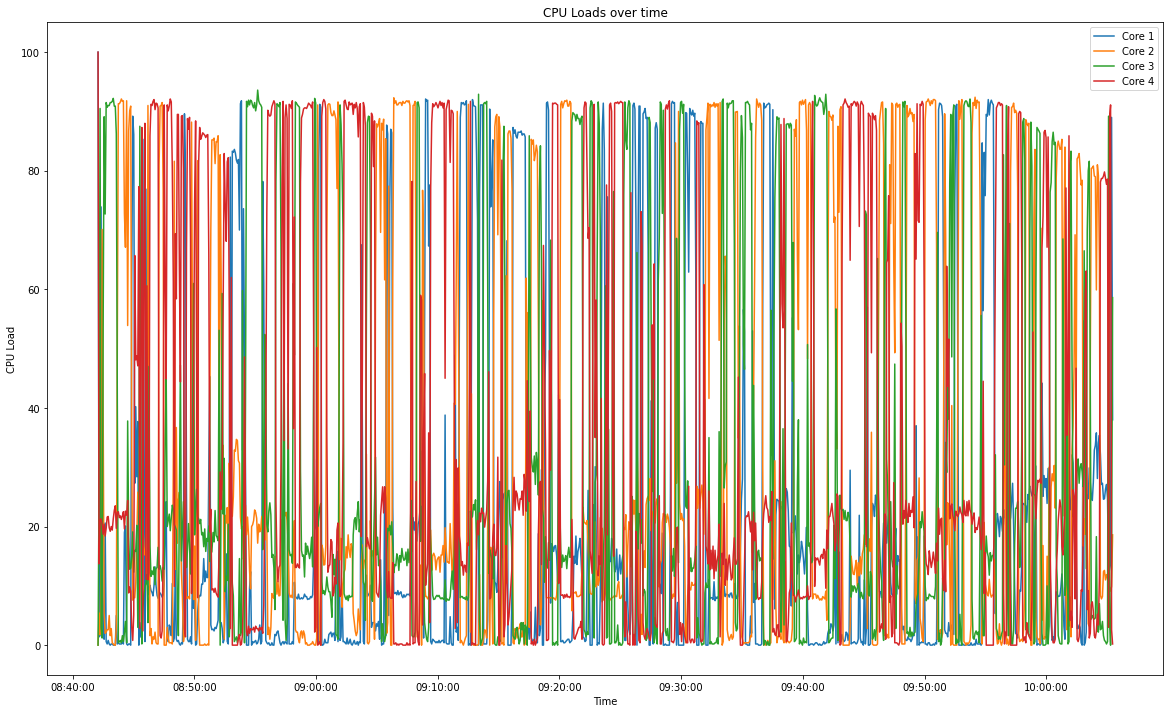

In [8]:
# Scatter Plot

import matplotlib.pyplot as plt
import matplotlib.dates as md

CoreData = CoreData[:999]

plt.figure(figsize=(20,12))
plt.plot(CoreData['Time'], CoreData['1'], label = "Core 1")
plt.plot(CoreData['Time'], CoreData['2'], label = "Core 2")
plt.plot(CoreData['Time'], CoreData['3'], label = "Core 3")
plt.plot(CoreData['Time'], CoreData['4'], label = "Core 4")
plt.xlabel('Time')
ax=plt.gca()
xfmt = md.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
# Set the y axis label of the current axis.
plt.ylabel('CPU Load')
# Set a title of the current axes.
plt.title('CPU Loads over time')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

#g=sns.lineplot(data=CoreData)
#(g.set_axis_labels("Time", "CPU Load"))

#plt.show()